In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # Changed 'MinMaxScalar' to 'MinMaxScaler'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
f=pd.read_csv('/content/dataset - Sheet1.csv')
f

,Input,Ouput
0,1,12
1,2,22
2,3,32
3,4,42
4,5,52
5,6,62
6,7,72
7,8,82
8,9,92
9,10,102


In [ ]:
from google.colab import auth
import gspread
from google.auth import default
auth.authenticate_user()
creds,_=default()
gc=gspread.authorize(creds)

In [ ]:
worksheet=gc.open('dataset').sheet1
data=worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Ouput':'float'})
dataset1.head()

,Input,Ouput
0,1.0,12.0
1,2.0,22.0
2,3.0,32.0
3,4.0,42.0
4,5.0,52.0


In [ ]:
x=dataset1[['Input']]
y=dataset1[['Ouput']]
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)




In [ ]:
Scaler=MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1=Scaler.transform(X_train)

In [ ]:
ai_brain=Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer='rmsprop',loss='mse')
ai_brain.fit(X_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step - loss: 13222.8457
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13218.1348
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13214.6514
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13211.7070
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13209.0674
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13206.6250
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13204.3242
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13202.1270
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13200.0098
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13197.9541
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13195.9492
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13193.9834
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13192.0479
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13190.1396
Epoch 15/2000


In [ ]:
loss_df=pd.DataFrame(ai_brain.history.history)

<Axes: >

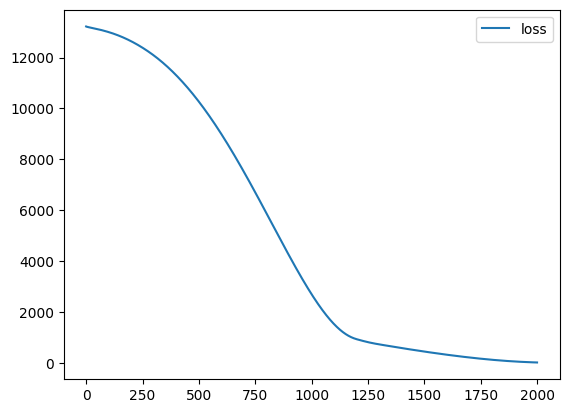

In [ ]:
loss_df.plot()

In [ ]:
X_test1=Scaler.transform(X_test)

In [ ]:
ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 11.9785


11.978482246398926

In [ ]:
X_n1 = [[2]]

In [ ]:
X_n1_1=Scaler.transform(X_n1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[27.850994]], dtype=float32)